<h1> Illinois Education Census Data

In the last assignment I utilized census data for Texas to create data visuals about the educational attainment there, but now I will do a similar thing for Illinois given that I will need it too. However for this assignment i will be attempting to look for ways to up my data visualization more organized and allow for easier comparison

<h1> Importing 

importing pandas in order to do general wrangling tasks

In [42]:
import pandas as pd

importing geopandas to read and create visualizations of spatial data 

In [43]:
import geopandas as gpd

importing contextability to have the otion of constructing basemaps

In [44]:
import contextily as ctx

importing matplotlib.pyplot to have a greater capabilities of the plots

In [45]:
import matplotlib.pyplot as plt

now I load a geojson file that will let me do “spatial data exploration” and I assign it
to the variable gdf to make it easier to reference

In [46]:
gdf = gpd.read_file('acs2019_5yr_B15002_05000US17181.geojson')

now I'm going to pull the first 5 rows of data in my set by using the command .head() and get an idea of what I will work with 

In [47]:
gdf.head()

,geoid,name,B15002001,"B15002001, Error",B15002002,"B15002002, Error",B15002003,"B15002003, Error",B15002004,"B15002004, Error",...,"B15002031, Error",B15002032,"B15002032, Error",B15002033,"B15002033, Error",B15002034,"B15002034, Error",B15002035,"B15002035, Error",geometry
0,04000US17,Illinois,8686299.0,1166.0,4189131.0,962.0,56037.0,1854.0,23040.0,1171.0,...,3784.0,954818.0,6888.0,492287.0,5054.0,86349.0,2078.0,51569.0,1468.0,"MULTIPOLYGON (((-91.18529 40.63780, -91.17510 ..."
1,05000US17001,"Adams County, IL",46125.0,131.0,22204.0,82.0,160.0,80.0,31.0,37.0,...,258.0,3851.0,354.0,2065.0,262.0,155.0,65.0,85.0,53.0,"MULTIPOLYGON (((-91.42411 39.93575, -91.42464 ..."
2,05000US17003,"Alexander County, IL",4497.0,55.0,2085.0,56.0,17.0,14.0,0.0,16.0,...,100.0,236.0,70.0,50.0,35.0,9.0,12.0,0.0,16.0,"MULTIPOLYGON (((-89.19975 37.08887, -89.19963 ..."
3,05000US17005,"Bond County, IL",11741.0,300.0,6036.0,287.0,50.0,30.0,0.0,18.0,...,135.0,901.0,161.0,479.0,135.0,12.0,15.0,36.0,35.0,"MULTIPOLYGON (((-89.36179 39.02772, -89.35987 ..."
4,05000US17007,"Boone County, IL",35008.0,175.0,17144.0,140.0,311.0,143.0,278.0,172.0,...,292.0,2855.0,394.0,1198.0,236.0,180.0,86.0,105.0,79.0,"MULTIPOLYGON (((-88.94075 42.41387, -88.94074 ..."


row 0 shouldnt be there, illinous is the state and does not refer to a county so I'm going to remove it so it doesnt mess up any of my visualizations (due to its different scale). by using the .drop command I can remove the row

In [48]:
gdf = gdf.drop([0])

now I'm just going to confirm it removed that row, it did

In [49]:
gdf.head()

,geoid,name,B15002001,"B15002001, Error",B15002002,"B15002002, Error",B15002003,"B15002003, Error",B15002004,"B15002004, Error",...,"B15002031, Error",B15002032,"B15002032, Error",B15002033,"B15002033, Error",B15002034,"B15002034, Error",B15002035,"B15002035, Error",geometry
1,05000US17001,"Adams County, IL",46125.0,131.0,22204.0,82.0,160.0,80.0,31.0,37.0,...,258.0,3851.0,354.0,2065.0,262.0,155.0,65.0,85.0,53.0,"MULTIPOLYGON (((-91.42411 39.93575, -91.42464 ..."
2,05000US17003,"Alexander County, IL",4497.0,55.0,2085.0,56.0,17.0,14.0,0.0,16.0,...,100.0,236.0,70.0,50.0,35.0,9.0,12.0,0.0,16.0,"MULTIPOLYGON (((-89.19975 37.08887, -89.19963 ..."
3,05000US17005,"Bond County, IL",11741.0,300.0,6036.0,287.0,50.0,30.0,0.0,18.0,...,135.0,901.0,161.0,479.0,135.0,12.0,15.0,36.0,35.0,"MULTIPOLYGON (((-89.36179 39.02772, -89.35987 ..."
4,05000US17007,"Boone County, IL",35008.0,175.0,17144.0,140.0,311.0,143.0,278.0,172.0,...,292.0,2855.0,394.0,1198.0,236.0,180.0,86.0,105.0,79.0,"MULTIPOLYGON (((-88.94075 42.41387, -88.94074 ..."
5,05000US17009,"Brown County, IL",4863.0,167.0,3119.0,216.0,22.0,23.0,0.0,16.0,...,48.0,258.0,68.0,75.0,37.0,4.0,7.0,8.0,11.0,"MULTIPOLYGON (((-90.91469 40.01804, -90.91469 ..."


<h1> Dropping Columns

Given that I only want to get data on the amount of females and males that have a highschool degree & females and males that have a bachelor degree I will remove any other colums that pertain to other education level information.

First I output the existing columns as a list and see what I have to work with

In [50]:
list(gdf)

['geoid',
 'name',
 'B15002001',
 'B15002001, Error',
 'B15002002',
 'B15002002, Error',
 'B15002003',
 'B15002003, Error',
 'B15002004',
 'B15002004, Error',
 'B15002005',
 'B15002005, Error',
 'B15002006',
 'B15002006, Error',
 'B15002007',
 'B15002007, Error',
 'B15002008',
 'B15002008, Error',
 'B15002009',
 'B15002009, Error',
 'B15002010',
 'B15002010, Error',
 'B15002011',
 'B15002011, Error',
 'B15002012',
 'B15002012, Error',
 'B15002013',
 'B15002013, Error',
 'B15002014',
 'B15002014, Error',
 'B15002015',
 'B15002015, Error',
 'B15002016',
 'B15002016, Error',
 'B15002017',
 'B15002017, Error',
 'B15002018',
 'B15002018, Error',
 'B15002019',
 'B15002019, Error',
 'B15002020',
 'B15002020, Error',
 'B15002021',
 'B15002021, Error',
 'B15002022',
 'B15002022, Error',
 'B15002023',
 'B15002023, Error',
 'B15002024',
 'B15002024, Error',
 'B15002025',
 'B15002025, Error',
 'B15002026',
 'B15002026, Error',
 'B15002027',
 'B15002027, Error',
 'B15002028',
 'B15002028, Error',
 

I create a list of columns that I’ll keep. which are males that have a highschool degree, females
that have a highschool degree, males that have a bachelor degree, and females that have a bachelor
degree. But to know which columns is what from the list I use the. 

In [51]:
columns_to_keep = ['geoid',
'name',
'B15002001',
'B15002011',
'B15002015',
'B15002028',
'B15002032',
'geometry']

now I redefine gdf with the new list of columns to keep 

In [52]:
gdf = gdf[columns_to_keep]

now I'm checking that the redefinition happened, and that there is only the data columns I
want. I used the .head() command again to view it

In [53]:
gdf.head()

,geoid,name,B15002001,B15002011,B15002015,B15002028,B15002032,geometry
1,05000US17001,"Adams County, IL",46125.0,8333.0,3483.0,8002.0,3851.0,"MULTIPOLYGON (((-91.42411 39.93575, -91.42464 ..."
2,05000US17003,"Alexander County, IL",4497.0,858.0,211.0,974.0,236.0,"MULTIPOLYGON (((-89.19975 37.08887, -89.19963 ..."
3,05000US17005,"Bond County, IL",11741.0,2207.0,741.0,1681.0,901.0,"MULTIPOLYGON (((-89.36179 39.02772, -89.35987 ..."
4,05000US17007,"Boone County, IL",35008.0,6113.0,2168.0,6079.0,2855.0,"MULTIPOLYGON (((-88.94075 42.41387, -88.94074 ..."
5,05000US17009,"Brown County, IL",4863.0,1262.0,242.0,563.0,258.0,"MULTIPOLYGON (((-90.91469 40.01804, -90.91469 ..."


because I dont want to constanlty refer to the metadata.json to know what each column is, I am going to
rename them to make easier for me to idetify and refer to. to do that I first make the column
names into a list.

In [54]:
list(gdf)

['geoid',
 'name',
 'B15002001',
 'B15002011',
 'B15002015',
 'B15002028',
 'B15002032',
 'geometry']

now I replace the values with the appropriate column names by using the command .columns

In [55]:
gdf.columns= ['geoid',
'name',
'Total',
'males with HS degree',
'males with BA degree',
'females with HS degree',
'females with BA degree',
'geometry']

then I check again if it has been updated using .head()

In [56]:
gdf.head()

,geoid,name,Total,males with HS degree,males with BA degree,females with HS degree,females with BA degree,geometry
1,05000US17001,"Adams County, IL",46125.0,8333.0,3483.0,8002.0,3851.0,"MULTIPOLYGON (((-91.42411 39.93575, -91.42464 ..."
2,05000US17003,"Alexander County, IL",4497.0,858.0,211.0,974.0,236.0,"MULTIPOLYGON (((-89.19975 37.08887, -89.19963 ..."
3,05000US17005,"Bond County, IL",11741.0,2207.0,741.0,1681.0,901.0,"MULTIPOLYGON (((-89.36179 39.02772, -89.35987 ..."
4,05000US17007,"Boone County, IL",35008.0,6113.0,2168.0,6079.0,2855.0,"MULTIPOLYGON (((-88.94075 42.41387, -88.94074 ..."
5,05000US17009,"Brown County, IL",4863.0,1262.0,242.0,563.0,258.0,"MULTIPOLYGON (((-90.91469 40.01804, -90.91469 ..."


now I normalize the raw data and add colums to my data that give %’s of each
education level

In [57]:
gdf['percent males with HS degree'] = gdf['males with HS degree']/gdf['Total']*100
gdf['percent males with BA degree'] = gdf['males with BA degree']/gdf['Total']*100
gdf['percent females with HS degree'] = gdf['females with HS degree']/gdf['Total']*100
gdf['percent females with BA degree'] = gdf['females with BA degree']/gdf['Total']*100

checking again if it has been updated I use .head() and see if the columns have been added

In [58]:
gdf.head()

,geoid,name,Total,males with HS degree,males with BA degree,females with HS degree,females with BA degree,geometry,percent males with HS degree,percent males with BA degree,percent females with HS degree,percent females with BA degree
1,05000US17001,"Adams County, IL",46125.0,8333.0,3483.0,8002.0,3851.0,"MULTIPOLYGON (((-91.42411 39.93575, -91.42464 ...",18.066125,7.551220,17.348509,8.349051
2,05000US17003,"Alexander County, IL",4497.0,858.0,211.0,974.0,236.0,"MULTIPOLYGON (((-89.19975 37.08887, -89.19963 ...",19.079386,4.692017,21.658884,5.247943
3,05000US17005,"Bond County, IL",11741.0,2207.0,741.0,1681.0,901.0,"MULTIPOLYGON (((-89.36179 39.02772, -89.35987 ...",18.797377,6.311217,14.317349,7.673963
4,05000US17007,"Boone County, IL",35008.0,6113.0,2168.0,6079.0,2855.0,"MULTIPOLYGON (((-88.94075 42.41387, -88.94074 ...",17.461723,6.192870,17.364602,8.155279
5,05000US17009,"Brown County, IL",4863.0,1262.0,242.0,563.0,258.0,"MULTIPOLYGON (((-90.91469 40.01804, -90.91469 ...",25.951059,4.976352,11.577216,5.305367


<h1> Maps!

I'm using the first 500 rows of the gdf dataset to plot. I also add arguments as to specify the
utilization of the column “percent males with HS degree”. I also state to have a legend by making
it true. I also state to make it have blue tones (blue toned maps are visualizations for male data)

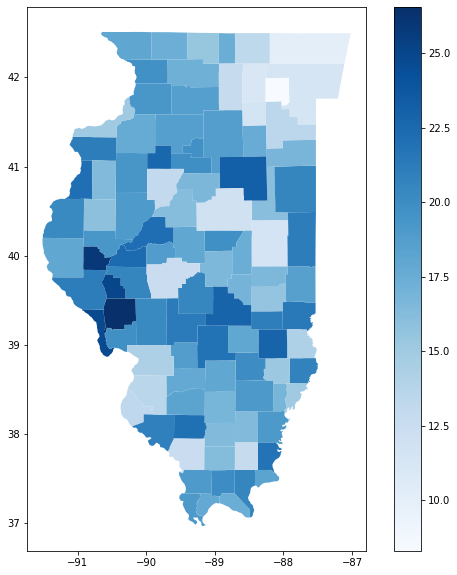

In [59]:
gdf.head(500).plot(figsize=(10,10),column='percent males with HS degree',legend=True, cmap='Blues')

Here I am doing the same thing as above but for “percent males with BA degree”

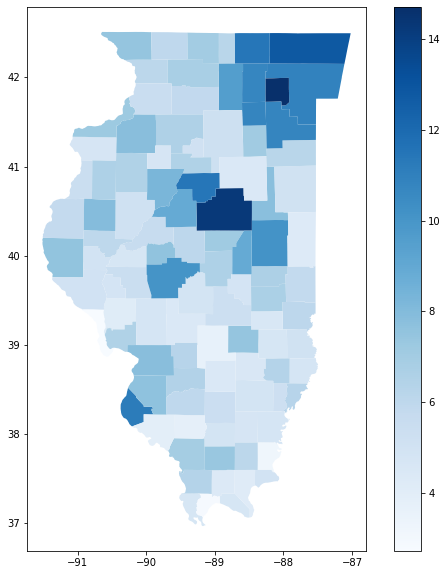

In [60]:
gdf.head(500).plot(figsize=(10,10),column='percent males with BA degree',legend=True, cmap='Blues')

Doing the same thing as the males but now for females. Here I am using the first 500 rows of the gdf dataset to plot. I also add arguments as to specify the utilization of the column “percent females with HS degree”. I also state to have a legend by making it true. I also state to make it have red tones (red toned maps are visualizations for female
data)

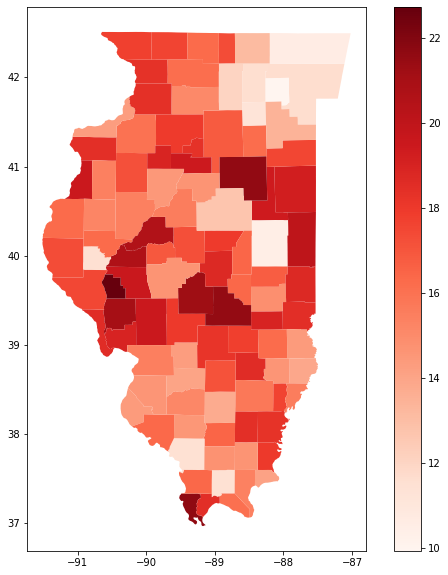

In [61]:
gdf.head(500).plot(figsize=(10,10),column='percent females with HS degree',legend=True, cmap='Reds')

Here I am doing the same thing as above but for “percent females with BA degree”

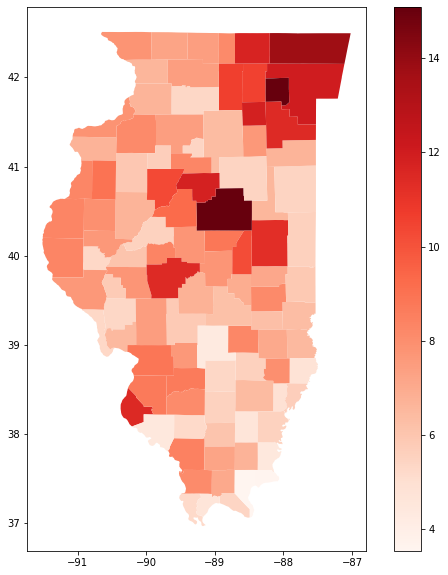

In [62]:
gdf.head(500).plot(figsize=(10,10),column='percent females with BA degree',legend=True, cmap='Reds')

The previous maps match up to the ones I made for texas but now I am going to see how i can remake these maps for my project, more organized and visually different.

here I am using the .subplots command to create multiple plots. I add argument to clarify that I will want one row of two plots (so they're side by side). I also set the figure's size. I then name each subplot (ex: ax1). for the first map, starting on the left I plot the column for percent males with HS degree, and set additional arguments to make it in shades of blue, in quantiles, and have a legend. I also make sure to name that plot percent males with HS degree. I do the same for the second plot but make sure I use the column for percent males with HS degree and that I title it that. I have to make sure i also assign the map to the correct subplot by making ax = ax1.

Text(0.5, 1.0, 'percent males with BA degree')

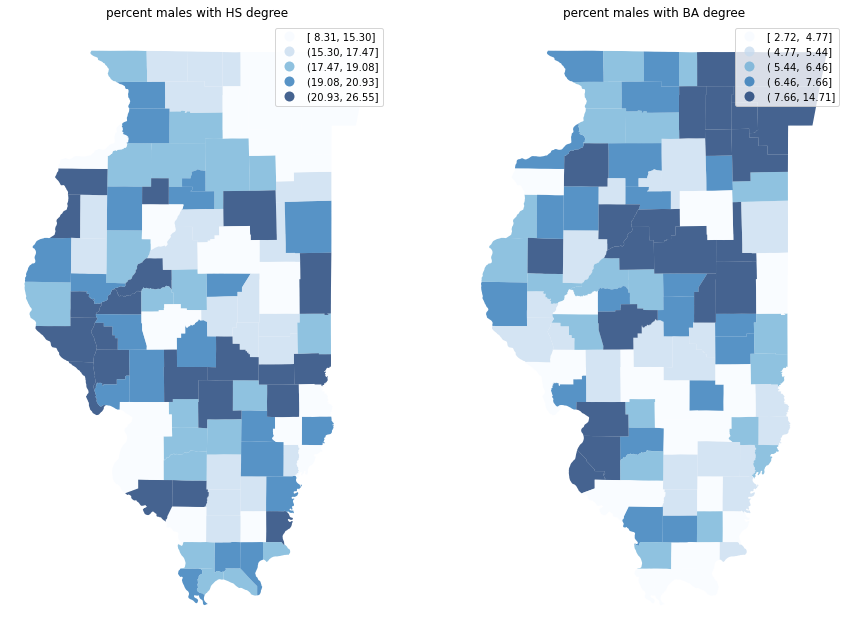

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))
ax1, ax2 = axs

gdf.plot(column='percent males with HS degree', 
            cmap='Blues', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("percent males with HS degree")


gdf.plot(column='percent males with BA degree', 
            cmap='Blues', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("percent males with BA degree")


This allows me to directly compare side by side the two education levels of males in the state and in different counties. Just by looking at the percentages I can discern that their are more people to graduate highschool than those who will recieve their BA. It can be seen that in areas around the big city of Chicago there are more people who have a BA but it is also in this area where there is the least amount of HS degrees. This may reflect a poor education system for teenagers but a thriving business/job area for adults. 

now I'm going to do the exact same thing but for females with either a BA or HS degree

Text(0.5, 1.0, 'percent females with BA degree')

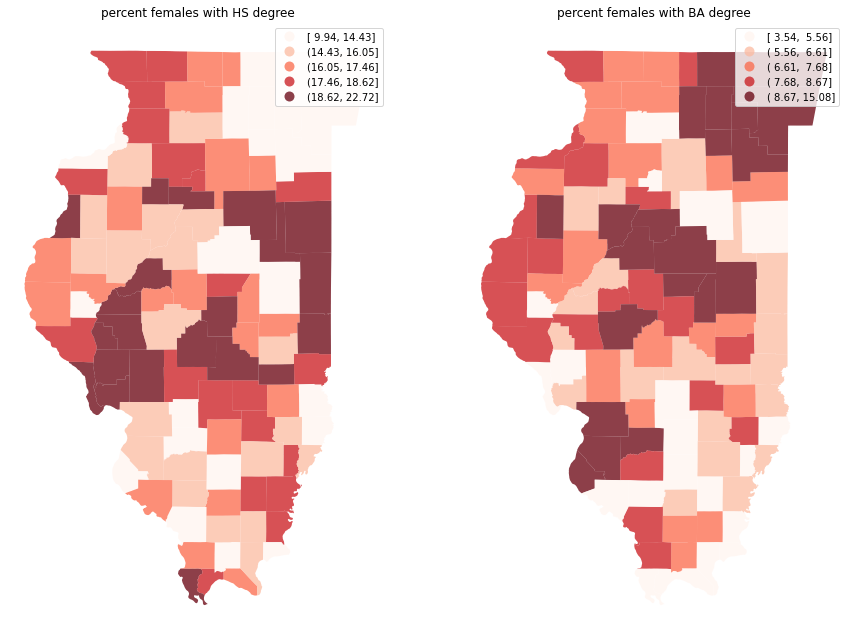

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))
ax1, ax2 = axs

gdf.plot(column='percent females with HS degree', 
            cmap='Reds', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("percent females with HS degree")


gdf.plot(column='percent females with BA degree', 
            cmap='Reds', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("percent females with BA degree")

Again this allows me to directly compare them, and I can see a similar trend as the male maps. Cities that have a denser amount of people who have BAs have a less HS people with degrees. There are still more women who graduate hs than there are people who have a BA, but there are more women who have either than men. 